<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import math

import numpy as np
import sympy as sp

import matplotlib.pyplot as plt

# **3.2.1. Limits and continuity**

The class notes state that limits are essential to calculus and mathematical analysis, and are used to define continuity, derivatives, and integrals.  More formally, if $f(x)$ is a function, the limit of $f(x)$ as $x$ approaches some value $a$ is the value $L$ that $f(x)$ gets closer to as $x$ gets closer to $a$, but not necessarily equal to $a$.

The notes define a continuous function as a function that does not have any abrupt changes in value, known as discontinuities.

I provide several examples below.  In the first example, I simply show use visualization and accumulation point list techniques to show how to find an approximation of a limit.

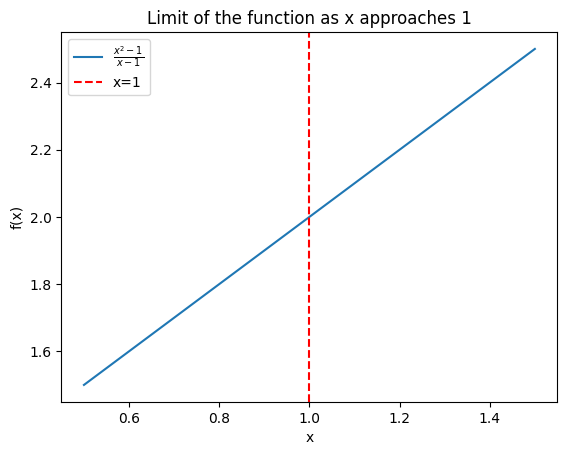

Limit approximation as x approaches 1: [1.99       1.99222222 1.99444444 1.99666667 1.99888889 2.00111111
 2.00333333 2.00555556 2.00777778 2.01      ]


In [2]:
def limit_function(x):
    return (x**2 - 1) / (x - 1)

x_vals = np.linspace(0.5, 1.5, 100)
y_vals = limit_function(x_vals)

plt.plot(x_vals, y_vals, label=r'$\frac{x^2 - 1}{x - 1}$')
plt.axvline(x=1, color='r', linestyle='--', label='x=1')
plt.title('Limit of the function as x approaches 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Numerical approximation near x = 1
x_approach = np.linspace(0.99, 1.01, 10)
limit_approx = limit_function(x_approach)
print("Limit approximation as x approaches 1:", limit_approx)


## Example 2

Example 2 is similar to Example 1, but I use the Sympy library to calcuate the value of the limit.

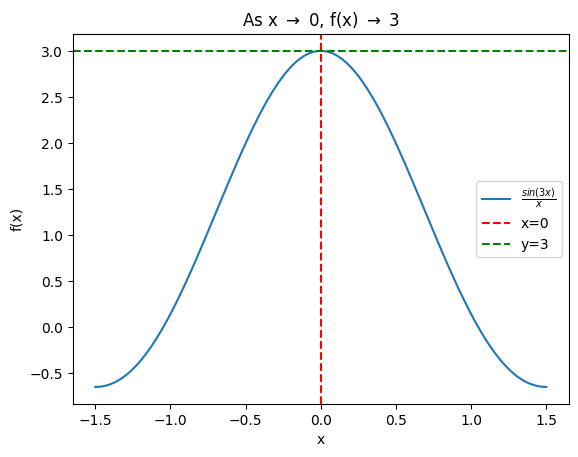

In [26]:
def get_lim():
  x = sp.symbols('x')
  expr = sp.sin(3 * x)/x;

  return sp.limit(expr, x, 0)

lim = get_lim()

x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.sin(3*x_vals)/x_vals

plt.plot(x_vals, y_vals, label=r'$\frac{sin(3x)}{x}$')
plt.axvline(x=0, color='r', linestyle='--', label='x=0')
plt.axhline(y=lim, color='g', linestyle='--', label=f'y={lim}')
plt.title(r'As x $\rightarrow$ 0, f(x) $\rightarrow$ ' + str(lim))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## Example 3

In Example 3, I use a piecewise function to show an example of a function that is not continuous.  The is_continuous function attempts to analyze the results of a function across a provided range and determine if it is continuous or not.

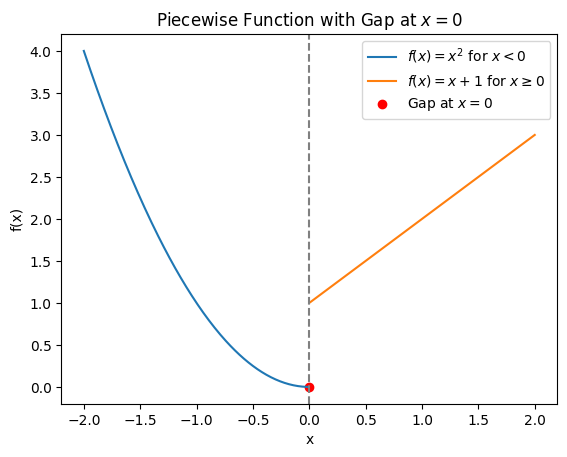

The function is not continuous on the interval [0, 1].


In [7]:
def piecewise_function(x):
    return np.where(x < 0, x**2, x + 1)


def is_continuous(f, a, b, num_points=1000, tolerance=1e-5):
    """
    Check if a function f is continuous on the interval [a, b].

    Parameters:
    - f: The function to check.
    - a: Start of the interval.
    - b: End of the interval.
    - num_points: Number of points to sample in the interval.
    - tolerance: The maximum allowable difference between function values.

    Returns:
    - True if f is continuous on [a, b], False otherwise.
    """
    x_values = np.linspace(a, b, num_points)
    f_values = f(x_values)

    # Check for discontinuities
    for i in range(1, len(f_values)):
        if abs(f_values[i] - f_values[i - 1]) > tolerance:
            return False
    return True

# Example usage
def my_function(x):
    return x**2  # This is a continuous function


# Define x values around zero
x_left = np.linspace(-2, -0.01, 200)
x_right = np.linspace(0.01, 2, 200)

# Get function values
y_left = piecewise_function(x_left)
y_right = piecewise_function(x_right)

# Plot the function with a gap at x = 0
plt.plot(x_left, y_left, label=r'$f(x) = x^2$ for $x < 0$')
plt.plot(x_right, y_right, label=r'$f(x) = x + 1$ for $x \geq 0$')
plt.scatter(0, piecewise_function(-0.01), color='r', label=r'Gap at $x=0$')

plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Piecewise Function with Gap at $x = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Check continuity on the interval [0, 1]
if is_continuous(piecewise_function, -2, 2):
    print("The function is continuous on the interval [0, 1].")
else:
    print("The function is not continuous on the interval [0, 1].")

# **3.2.2. Derivatives**

The derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to another variable.

The derivative of $f$ at $x_0$ is $f'(x_0) = \frac{df(x_0)}{dx} = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}$ provided the limit exists.

Again several examples are provided to demonstrate this idea.  The first uses the limit definition to calculate the derivative of a function and plots the function next to its derivative.

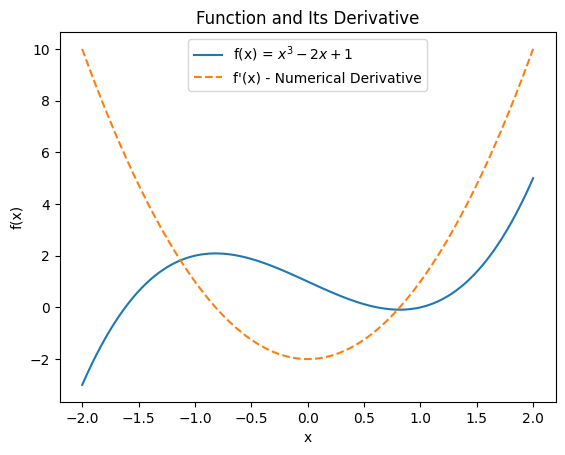

In [8]:
def function(x):
    return x**3 - 2*x + 1

def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

x_vals = np.linspace(-2, 2, 100)
y_vals = function(x_vals)
y_derivative = derivative(function, x_vals)

plt.plot(x_vals, y_vals, label="f(x) = $x^3 - 2x + 1$")
plt.plot(x_vals, y_derivative, label="f'(x) - Numerical Derivative", linestyle='--')
plt.title('Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


## Example 2

This example simulates the real-world application of a fluctuating temperature.  I use the limit definition of a derivative to again calculate the rate of change for each simulated tempurature value.  Then I plot the temperature and its rate of change.

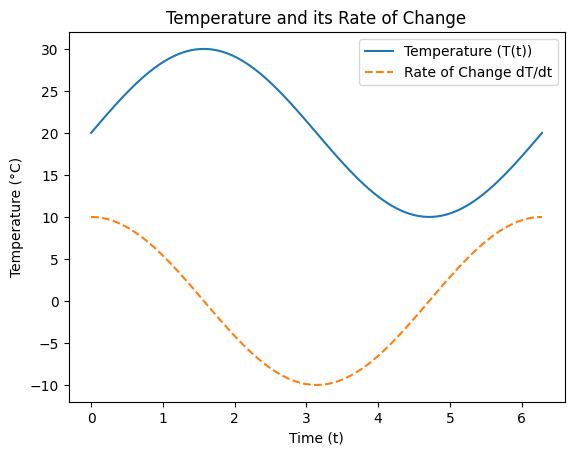

In [9]:
def temperature(t):
    return 20 + 10 * np.sin(t)

time_vals = np.linspace(0, 2 * np.pi, 100)
temperature_vals = temperature(time_vals)
temperature_rate_of_change = derivative(temperature, time_vals)

plt.plot(time_vals, temperature_vals, label="Temperature (T(t))")
plt.plot(time_vals, temperature_rate_of_change, label="Rate of Change dT/dt", linestyle='--')
plt.title('Temperature and its Rate of Change')
plt.xlabel('Time (t)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


## Example 3

I'm interested in learning more about the Sympy library, so in Example 3, I use it to calculate the derivative of a function.  I get the function back (which I print) then use the lambdify method of Sympy to make the symbolic representations of the original function and its derivative executable.  I then plot both.

4*x
f(3) = 21
f'(3) = 12


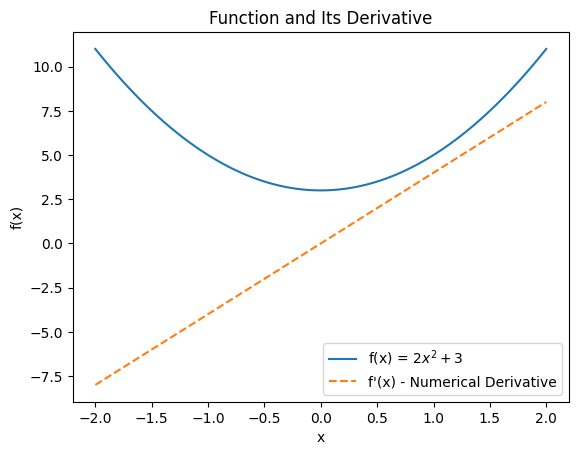

In [14]:
x = sp.Symbol('x')

# 2x^2 + 3
f = 2*x**2+3
f_prime = f.diff(x)

print(f_prime)

f = sp.lambdify(x, f)
f_prime = sp.lambdify(x, f_prime)

print(f'f(3) = {f(3)}')
print(f'f\'(3) = {f_prime(3)}')

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)
y_derivative = f_prime(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = $2x^2 + 3$")
plt.plot(x_vals, y_derivative, label="f'(x) - Numerical Derivative", linestyle='--')
plt.title('Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# **3.2.3. Taylor's theorem**

The class notes state that Taylor's theorem gives an approximation of a differentiable function around a given point by a polynomial.  Taylor's Theorem provides a way to approximate a smooth function using polynomials. It expresses a function as a sum of its derivatives at a single point, plus a remainder term that accounts for the error in the approximation.

Again, I provide several examples showing various implementations of this idea.  The first shows an aproximation of $e^x$.  The actual values are plotted next to the approximation.

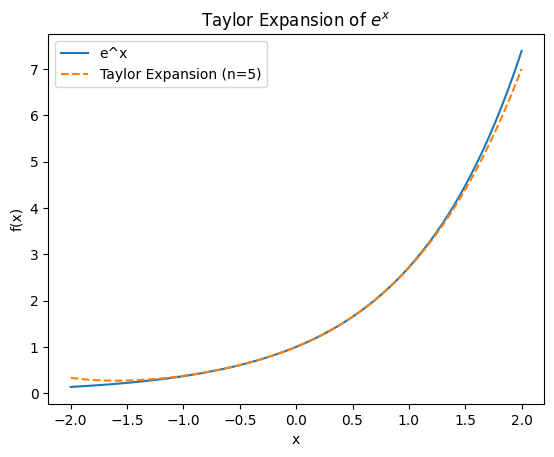

In [16]:
def taylor_expansion_e(x, n):
    return sum([x**i / math.factorial(i) for i in range(n)])

x_vals = np.linspace(-2, 2, 100)
actual_vals = np.exp(x_vals)
taylor_approx_vals = [taylor_expansion_e(x, 5) for x in x_vals]

plt.plot(x_vals, actual_vals, label="e^x")
plt.plot(x_vals, taylor_approx_vals, label="Taylor Expansion (n=5)", linestyle='--')
plt.title('Taylor Expansion of $e^x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


## Example 2

The second example is simlar to the first, but shows how to implement an approximation of sin($x$).

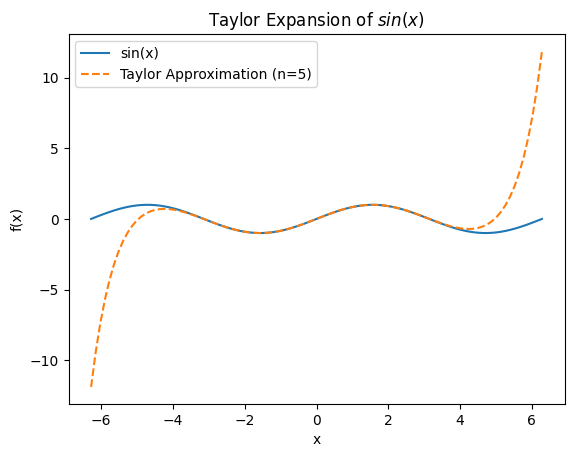

In [17]:
def taylor_expansion_sin(x, n):
    return sum([((-1)**k * x**(2*k+1)) / math.factorial(2*k+1) for k in range(n)])

x_vals = np.linspace(-2*np.pi, 2*np.pi, 100)
sin_vals = np.sin(x_vals)
taylor_sin_vals = [taylor_expansion_sin(x, 5) for x in x_vals]

plt.plot(x_vals, sin_vals, label="sin(x)")
plt.plot(x_vals, taylor_sin_vals, label="Taylor Approximation (n=5)", linestyle='--')
plt.title('Taylor Expansion of $sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# Example 3

In keeping with my fascination around Sympy, I found an example that uses that library to calculate sin($x$).

From: https://firsttimeprogrammer.blogspot.com/2015/03/taylor-series-with-python-and-sympy.html

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


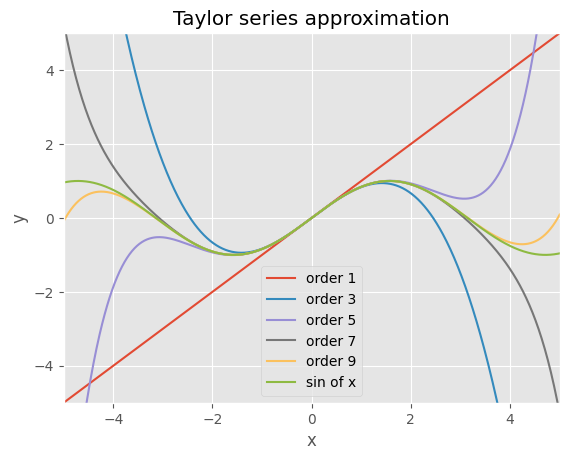

In [18]:
plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sp.Symbol('x')
f = sp.sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

# Plot results
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,10,2):
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,np.sin(x1),label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()